In [21]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../'))

import numpy as np
from matplotlib import pyplot as plt
import h5py
import arrayfire as af

from dg_maxwell import params
from dg_maxwell import msh_parser
from dg_maxwell import lagrange
from dg_maxwell import global_variables as gvar
from dg_maxwell import advection_2d_arbit_mesh as a2d_arbit_mesh
from dg_maxwell import utils

af.set_backend(params.backend)
af.set_device(params.device)

plt.rcParams['figure.figsize']     = 12, 7.5
plt.rcParams['lines.linewidth']    = 1.5
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.weight']        = 'bold'
plt.rcParams['font.size']          = 20  
plt.rcParams['font.sans-serif']    = 'serif'
plt.rcParams['text.usetex']        = True
plt.rcParams['axes.linewidth']     = 1.5
plt.rcParams['axes.titlesize']     = 'medium'
plt.rcParams['axes.labelsize']     = 'medium'

plt.rcParams['xtick.major.size']   = 8
plt.rcParams['xtick.minor.size']   = 4
plt.rcParams['xtick.major.pad']    = 8
plt.rcParams['xtick.minor.pad']    = 8
plt.rcParams['xtick.color']        = 'k'
plt.rcParams['xtick.labelsize']    = 'medium'
plt.rcParams['xtick.direction']    = 'in'    

plt.rcParams['ytick.major.size']   = 8
plt.rcParams['ytick.minor.size']   = 4
plt.rcParams['ytick.major.pad']    = 8
plt.rcParams['ytick.minor.pad']    = 8
plt.rcParams['ytick.color']        = 'k'
plt.rcParams['ytick.labelsize']    = 'medium'
plt.rcParams['ytick.direction']    = 'in'
plt.rcParams['text.usetex']        = True
plt.rcParams['text.latex.unicode'] = True

In [22]:
def print_with_index(datas):
    datas = np.array(datas)
    for index, row in enumerate(datas):
        print(index, '\t->', end = '\t')
        for data in row:
            print(np.round(data, 3), end = '\t')
        print()
    print()

In [23]:
params.mesh_file = '../read_and_plot_mesh/mesh/square_mesh_4_parts.msh'
advec_var = gvar.advection_variables(params.N_LGL, params.N_quad,
                                     params.x_nodes, params.N_Elements,
                                     params.c, params.total_time, params.wave,
                                     params.c_x, params.c_y, params.courant,
                                     params.mesh_file, params.total_time_2d)

gmshTranslator: Initializing...
gmshTranslator: Mesh has 81 nodes.
gmshTranslator: Mesh has 49 elements.
gmshTranslator: Processed 134 lines.
gmshTranslator: There are 1 physical groups available: 
gmshTranslator:      > 0
gmshTranslator: Parsing nodes
gmshTranslator: Parsing elements
gmshTranslator: No rules for elements... skipping elements.
gmshTranslator: Parsing nodes
gmshTranslator: No rules for nodes... skipping nodes.
gmshTranslator: Parsing elements
[-1.  1.] 	 vertex
[-1. -1.] 	 vertex
[ 1. -1.] 	 vertex
[ 1.  1.] 	 vertex
advection_variables __init__ completed


/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


gmshTranslator: Ending


/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


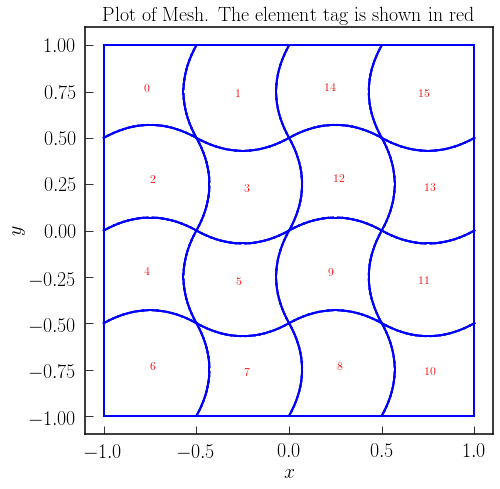

In [24]:
axes_handler = plt.axes()


msh_parser.plot_mesh_grid(advec_var.nodes, advec_var.elements,
                          advec_var.xi_LGL, advec_var.eta_LGL,
                          axes_handler, plot_LGL_grid = False,
                          print_element_tag = True)

# plt.title(r'Grid plot of a mesh for $N_{LGL} = 8$.'
#           '\n Red lines are mesh grid, and \n'
#           'blue lines are element boundaries.')
plt.title(r'Plot of Mesh. The element tag is shown in red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axes().set_aspect('equal')

# plt.savefig('square.png')
plt.show()

# Prototype to detect an edge of a quadrangle

In [5]:
elements = advec_var.elements

element_tag = 0

x_edge = af.constant(0., d0 = advec_var.elements.shape[0], d1 = params.N_LGL, d2 = 4, dtype = af.Dtype.f64)
y_edge = af.constant(0., d0 = advec_var.elements.shape[0], d1 = params.N_LGL, d2 = 4, dtype = af.Dtype.f64)

edge_id = 0
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))

edge_id = 1
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))


edge_id = 2
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))

edge_id = 3
x_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.x_e_ij,
                                                              edge_id, advec_var))
y_edge[:, :, edge_id] = af.transpose(a2d_arbit_mesh.u_at_edge(advec_var.y_e_ij,
                                                              edge_id, advec_var))


In [6]:
x_edge_c = af.mean(x_edge, dim = 1)
y_edge_c = af.mean(y_edge, dim = 1)

x_quad_c = af.mean(af.mean(x_edge, dim = 1), dim = 2)
y_quad_c = af.mean(af.mean(y_edge, dim = 1), dim = 2)

/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


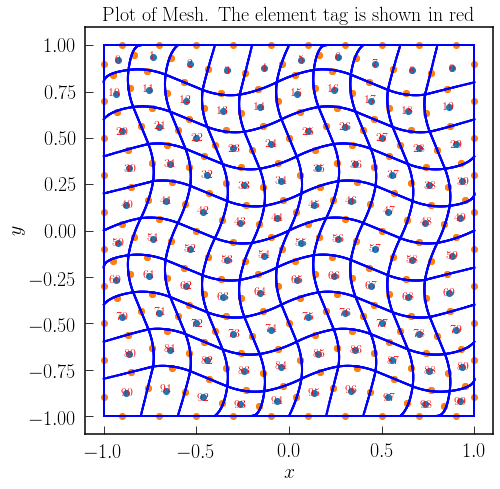

In [7]:
# Testing if the centroids are correct

axes_handler = plt.axes()


msh_parser.plot_mesh_grid(advec_var.nodes, advec_var.elements,
                          advec_var.xi_LGL, advec_var.eta_LGL,
                          axes_handler, plot_LGL_grid = False,
                          print_element_tag = True)

plt.scatter(x_quad_c, y_quad_c)
plt.scatter(af.moddims(x_edge_c, d0 = advec_var.elements.shape[0] * 4, d1 = 1, d2 = 1),
            af.moddims(y_edge_c, d0 = advec_var.elements.shape[0] * 4, d1 = 1, d2 = 1))

plt.title(r'Plot of Mesh. The element tag is shown in red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axes().set_aspect('equal')

# plt.savefig('square.png')
plt.show()

In [8]:
delta_x_edge_c = af.reorder(af.broadcast(utils.add, x_edge_c, -x_quad_c), d0 = 0, d1 = 2, d2 = 1)
delta_y_edge_c = af.reorder(af.broadcast(utils.add, y_edge_c, -y_quad_c), d0 = 0, d1 = 2, d2 = 1)

In [9]:
delta_xy_complex = np.array(delta_x_edge_c + 1j * delta_y_edge_c)

In [13]:
edge_angle = af.np_to_af_array(np.angle(delta_xy_complex, deg = True))
angle_less_than_zero = af.cast(edge_angle < 0, dtype = af.Dtype.f64)
edge_angle = edge_angle + angle_less_than_zero * 360
print(edge_angle)

arrayfire.Array()
Type: double

[100 4 1 1]
  195.2227   252.1161    17.8839    74.7773 
  172.1491   247.2030   357.3504    61.7733 
  163.5471   252.5293   342.9740    70.6587 
  177.4446   255.8800   351.8629    75.3854 
  194.9887   254.7599    12.2904    73.8727 
  191.8653   249.5662    15.5161    65.9384 
  172.1491   247.2030   357.3504    61.7733 
  163.5471   252.5293   342.9740    70.6587 
  177.4446   255.8800   351.8629    75.3854 
  193.2769   256.7231     9.9938    80.0062 
  208.2267   272.6496    22.7970    97.8509 
  174.5723   279.1582   350.8418    95.4277 
  158.2124   278.8939   337.0285    95.5860 
  171.3558   278.6442   354.2463    95.7537 
  197.0018   278.7379    19.8807    95.6885 
  198.8293   279.0554    17.9653    95.4871 
  174.5723   279.1582   350.8418    95.4277 
  158.2124   278.8939   337.0285    95.5860 
  171.3558   278.6442   354.2463    95.7537 
  194.1200   272.5554    14.6146    98.1371 
  199.3413   287.0260    17.4707   106.4529 
  174.4140 

In [14]:
# Identifying physical right edges
physical_right_edge = (edge_angle >= 315.) * (edge_angle <= 360) + (edge_angle >= 0.) * (edge_angle <= 45)

# Identifying physical top edges
physical_top_edge = (edge_angle >= 45) * (edge_angle <= 135)

# Identifying physical left edges
physical_left_edge = (edge_angle >= 135) * (edge_angle <= 225)

# Identifying physical left edges
physical_bottom_edge = (edge_angle >= 225) * (edge_angle < 315)

In [18]:
print_with_index(physical_top_edge)

0 	->	0	0	0	1	
1 	->	0	0	0	1	
2 	->	0	0	0	1	
3 	->	0	0	0	1	
4 	->	0	0	0	1	
5 	->	0	0	0	1	
6 	->	0	0	0	1	
7 	->	0	0	0	1	
8 	->	0	0	0	1	
9 	->	0	0	0	1	
10 	->	0	0	0	1	
11 	->	0	0	0	1	
12 	->	0	0	0	1	
13 	->	0	0	0	1	
14 	->	0	0	0	1	
15 	->	0	0	0	1	
16 	->	0	0	0	1	
17 	->	0	0	0	1	
18 	->	0	0	0	1	
19 	->	0	0	0	1	
20 	->	0	0	0	1	
21 	->	0	0	0	1	
22 	->	0	0	0	1	
23 	->	0	0	0	1	
24 	->	0	0	0	1	
25 	->	0	0	0	1	
26 	->	0	0	0	1	
27 	->	0	0	0	1	
28 	->	0	0	0	1	
29 	->	0	0	0	1	
30 	->	0	0	0	1	
31 	->	0	0	0	1	
32 	->	0	0	0	1	
33 	->	0	0	0	1	
34 	->	0	0	0	1	
35 	->	0	0	0	1	
36 	->	0	0	0	1	
37 	->	0	0	0	1	
38 	->	0	0	0	1	
39 	->	0	0	0	1	
40 	->	0	0	0	1	
41 	->	0	0	0	1	
42 	->	0	0	0	1	
43 	->	0	0	0	1	
44 	->	0	0	0	1	
45 	->	0	0	0	1	
46 	->	0	0	0	1	
47 	->	0	0	0	1	
48 	->	0	0	0	1	
49 	->	0	0	0	1	
50 	->	0	0	0	1	
51 	->	0	0	0	1	
52 	->	0	0	0	1	
53 	->	0	0	0	1	
54 	->	0	0	0	1	
55 	->	0	0	0	1	
56 	->	0	0	0	1	
57 	->	0	0	0	1	
58 	->	0	0	0	1	
59 	->	0	0	0	1	
60 	->	0	0	0	1	
61 	->	0	0	0	1	
62 	->	0	0	0	1	
63

In [20]:
edge_reorder = physical_left_edge * 1 + physical_bottom_edge * 2 + physical_right_edge * 3 + physical_top_edge * 4 - 1
print(edge_reorder)

arrayfire.Array()
Type: long int

[100 4 1 1]
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         